In [1]:
#!pip install nrclex
!pip install cufflinks --upgrade

In [2]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/sherlock/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
# import 
from nrclex import NRCLex

import numpy as np
import pandas as pd

In [4]:
#input
text='I loathe that restaurent'

#create object
emotion= NRCLex(text)

#using method to classify emotions
print('\n', emotion.words)
print('\n', emotion.affect_dict)



 ['I', 'loathe', 'that', 'restaurent']

 {'loathe': ['anger', 'disgust', 'negative']}


In [5]:
'''long_text = 'I learned that every'\
            'mortal will taste death,'\
            'but only some will'\
            'taste life.'  '''
long_text = 'Rewarding work, great teamwork, highly motivated and talented individuals, '\
            'great work-life balance, safe work environment, '\
            'outstanding opportunities, great culture, fully open to remote work, '\
            'great benefits, fantastic pay, treats contractors like full time employees which '\
            'allows for easier conversation to FTE status, '\
            'great onboarding experience and great tech stack. '

emotion_long= NRCLex(long_text)
print('\n', emotion_long.affect_dict)
print('\n', emotion_long.raw_emotion_scores)


 {'balance': ['positive'], 'safe': ['joy', 'positive', 'trust'], 'outstanding': ['joy', 'negative', 'positive'], 'culture': ['positive'], 'fully': ['positive', 'trust'], 'pay': ['anticipation', 'joy', 'positive', 'trust'], 'full': ['positive'], 'time': ['anticipation'], 'status': ['positive']}

 {'positive': 8, 'joy': 3, 'trust': 3, 'negative': 1, 'anticipation': 2}


In [6]:
#top emotions return dominant emotions
print('\n', emotion_long.top_emotions)


 [('positive', 0.47058823529411764)]


In [7]:
#"affect emotion" standardizes Raw emotion scores
print('\n', emotion_long.affect_frequencies)


 {'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 'trust': 0.17647058823529413, 'surprise': 0.0, 'positive': 0.47058823529411764, 'negative': 0.058823529411764705, 'sadness': 0.0, 'disgust': 0.0, 'joy': 0.17647058823529413, 'anticipation': 0.11764705882352941}


In [8]:
df = pd.read_csv('archive/covid19_tweets.csv')
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [9]:
# let us start with missing values

import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

Missing_values = df.isnull().sum() / len(df) *100

Missing_values.iplot(kind='bar',title='Missing values in each columns in %',theme='white',color='#3DD8AD')

<AxesSubplot:title={'center':'Missing values in each columns'}>

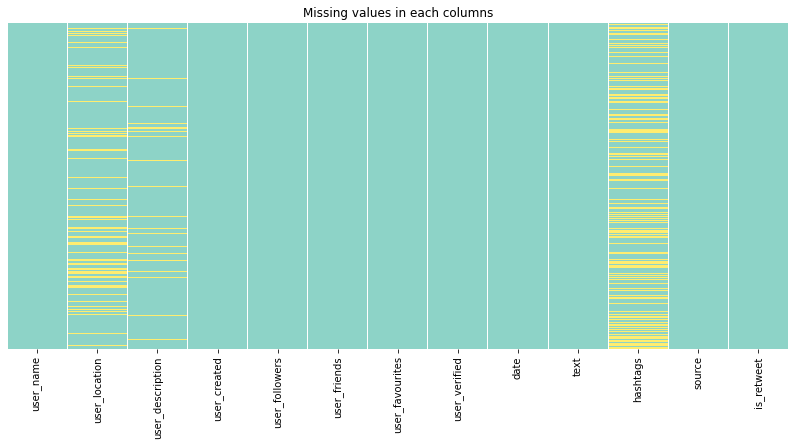

In [10]:
# we can how many rows are empty in each cloumn through visual
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14,6))
plt.title('Missing values in each columns')
sns.set_context(context='notebook',font_scale=1.5)
sns.heatmap(df.isnull(),cmap='Set3',cbar=False,yticklabels=False)



In [11]:


df['user_location'].value_counts()[0:5]

#below results seems to be fine but after deep cleaning 
#the location column found that United states has the higer number of tweets



India               3741
United States       2455
New Delhi, India    1721
Mumbai, India       1401
Washington, DC      1354
Name: user_location, dtype: int64

In [12]:
# cleaning user location column

df['user_location'] = df['user_location'].str.replace('Stuck in the Middle','None')


# well we can create a list to each sub location merge with Main location

India_list = ['आर्यावर्त','. भारत','New Delhi, India','Mumbai, India','Chennai, India',
              'Hyderabad, India','Bhubaneshwar, India','Bengaluru, India',
              'New Delhi','Mumbai','Chennai','Bhubaneswar','Jammu And Kashmir'
             'Guwahati, India','Odisha','Pune, India','Bangalore','India, India',
             'India India . India . ','India, India','Jammu And Kashmir','Hyderabad',
             'Jaipur, India','INDIA','Maharashtra, India','Delhi','India','Kolkata, India',
              'BENGALURU','Ahmadabad City, India','Guwahati  India']

df['user_location'] = df['user_location'].str.replace('|'.join(India_list),'India')
df['user_location'] = df['user_location'].str.replace('India  India','India')

U_S_list = ['Washington, DC','New York, NY','Los Angeles, CA','USA','California, USA','Atlanta, GA','Chicago, IL',
            'Boston, MA','New York','San Francisco, CA','Texas, United States',
            'Houston, TX','Florida, United States','Seattle, WA','San Diego, CA',
           'Washington, D.C.','Austin, TX','New York, United States','Text RESIST to 50409',
            'Texas','United States, United States','NYC','astroworld','New Jersey, United States','Las Vegas, NV',
           'United States City','Philadelphia, PA','Los Angeles','California','New Jersey, United States',
            'United States, United States','United States City', 'Pewee Valley, KY','Global','Earth','Worldwide',
            'WORLDWIDE','Stuck in the Middle','535 Radio Lane, Henderson, NC','Shoreview, MN','Nashville, TN | Tucson','United States|United States, AZ',
            'Everywhere! ','Florida, United States','Florida, United States','United States City','Planet Location Unknown',
           'New Jersey, United States','Florida','Brooklyn, NY','United States','Baltimore, MD','New Orleans, Louisiana',
           'Virginia, United States','Raleigh, NC','Memphis, TN','Ohio, United States','North Carolina, United States',
           'Buffalo, NY','Ohio, United States','Sacramento, CA','Sacramento, CA','Oakland, CA',
           'United States, United States','Planet United States','United States']

df['user_location'] = df['user_location'].str.replace('|'.join(U_S_list),'United States')

df['user_location'] = df['user_location'].str.replace('United States  United States','United States')


U_K_list =['London, England','London','UK','London, UK','England, United Kingdom','United Kingdom, United Kingdom','United Kingdom  United Kingdom']

df['user_location'] = df['user_location'].str.replace('|'.join(U_K_list),'United Kingdom')


Canada_list = ['Toronto, Ontario','Toronto','Ontario, Canada','Canada, Canada','Vancouver',
              'Vancouver, British Columbia','Canada  Canada']

df['user_location'] = df['user_location'].str.replace('|'.join(Canada_list),'Canada')


Australia_list = ['Melbourne, Victoria','Sydney, Australia','Sydney, New South Wales',
                  'Sydney, New South Wales','Melbourne, Australia','Melbourne','Canberra']

df['user_location'] = df['user_location'].str.replace('|'.join(Australia_list),'Australia')



Philippines_list = ['Manila, Philippines']

df['user_location'] = df['user_location'].str.replace('|'.join(Philippines_list),'Philippines')

South_Africa_list = ['Johannesburg  South Africa','Cape Town  South Africa','Johannesburg  South Africa']

df['user_location'] = df['user_location'].str.replace('|'.join(South_Africa_list),'South Africa')

df['user_location'] = df['user_location'].str.replace(r'\W',' ')


In [13]:
# this is after cleaning the location column
df['user_location'].value_counts()[0:5]



United States     17113
India             12342
United Kingdom     4822
Australia          2642
Canada             1895
Name: user_location, dtype: int64

In [14]:
# cleaning user_created column

# converting from object to datetime

df['user_created'] = pd.to_datetime(df['user_created'])

In [15]:
#cleaning data column

df['date'] = pd.to_datetime(df['date'])

# let us create a new column for Month and year from the date column

df['Month'] = df['date'].dt.month
df['Year'] = df['date'].dt.year

In [16]:
# cleaning df['hashtags']

# let us remove the non-Alphanumeric
df['hashtags'] = df['hashtags'].str.replace(r'\W',' ')# using Regural expression code to remove the +-=

hastags_list_clean = ['nan','nan, ',' ...,']
df['hashtags'] = df['hashtags'].str.replace('|'.join(hastags_list_clean),'')

In [17]:
# cleaning the text column

df['text'] = df['text'].str.replace(r'\W',' ')
df['text'] = df['text'].str.replace(r'\d+',' ')
df['text'] = df['text'].str.replace('@'," ")

In [ ]:
#!pip install spacy
!pip3 install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz

In [18]:
#let see what we have in the words
import spacy

nlp = spacy.load('en_core_web_sm')



hastag_token = ''

for words in df['hashtags'].value_counts().index[0:100]:
    hastag_token += words

doc = nlp(hastag_token)

2022-03-03 18:27:29.950113: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/sherlock/catkin_ws/devel/lib:/opt/ros/noetic/lib
2022-03-03 18:27:29.950146: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [19]:
from spacy import displacy


displacy.render(doc, style='ent',jupyter=True)

# Hastags 
# using spacy-displacy analysing the Hastag words 

/home/sherlock/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Verified user and unverified user')

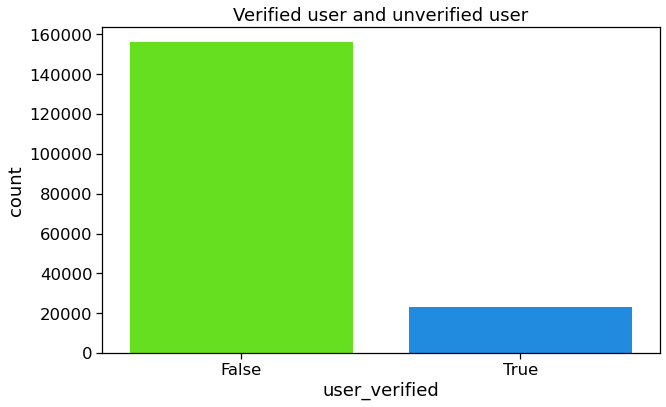

In [20]:
# no. of user is verified or not

plt.figure(figsize=(10,6))
sns.set_context(context='notebook',font_scale=1.5)
sns.countplot(df['user_verified'],palette='gist_rainbow')
plt.title('Verified user and unverified user')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/sherlock/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


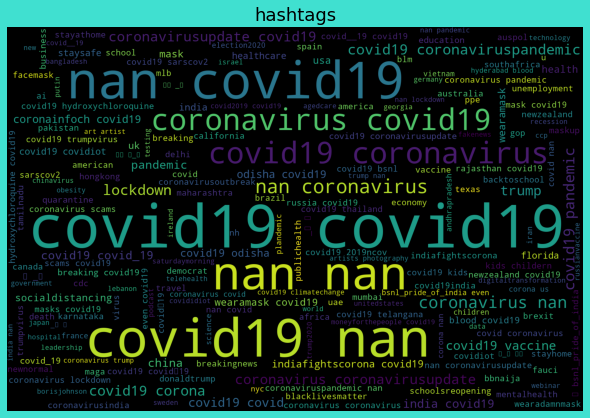

In [30]:
#!pip install wordcloud
# let us plot hastag
import nltk
nltk.download('stopwords')
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
#print(stopwords.words('english'))


comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df['hashtags']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 1800, height = 1200, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = '#40e0d0') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('hashtags')  
plt.show() 

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/sherlock/nltk_data...
/home/sherlock/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



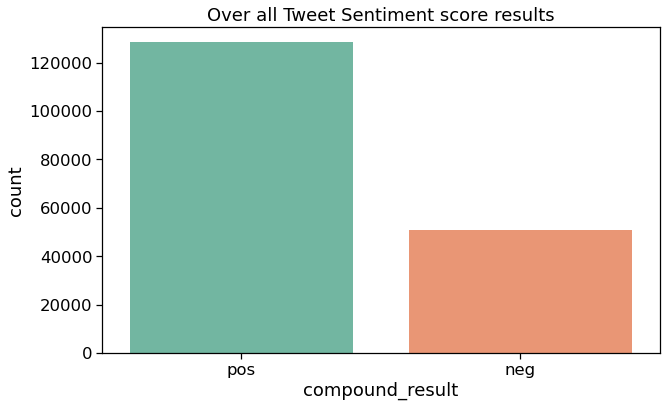

In [32]:
#sentiment analysis using Vader
import nltk

nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer


sid = SentimentIntensityAnalyzer()

# creating the new column for pol score

df['Sentiment_scores'] = df['text'].apply(lambda tweet: sid.polarity_scores(tweet))

# creating new column for the compound sentiment Analysis Score

df['compound'] = df['Sentiment_scores'].apply(lambda x:x['compound'])

# using lambda function to mark 'neg' and 'pos'  compound score

df['compound_result'] = df['compound'].apply(lambda score: 'pos' if score >=0 else 'neg')

#plotting
plt.figure(figsize=(10,6))
sns.set_context(context='notebook',font_scale=1.5)
sns.countplot(df['compound_result'],palette='Set2')
plt.title('Over all Tweet Sentiment score results');

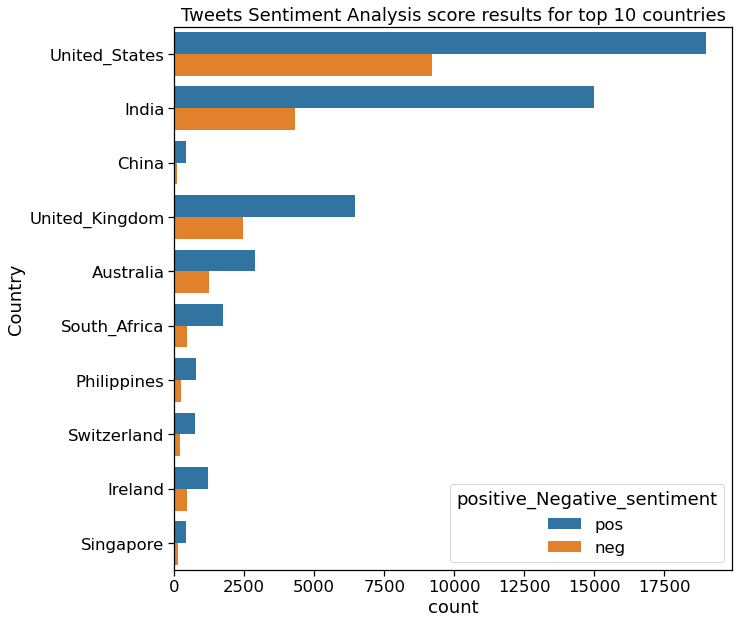

In [33]:
# Top 12 country with their tweet sentiment score

US_compound_score    = df[df['user_location'].str.contains('United States',na=False)]['compound_result']
India_compound_score = df[df['user_location'].str.contains('India',na=False)]['compound_result']
China_compound_score = df[df['user_location'].str.contains('China',na=False)]['compound_result']
United_Kingdom_score = df[df['user_location'].str.contains('United Kingdom',na=False)]['compound_result']
Australia_score       = df[df['user_location'].str.contains('Australia',na=False)]['compound_result']
South_Africa_score     =  df[df['user_location'].str.contains('South Africa',na=False)]['compound_result']
Lagos_Nigeria_score     =  df[df['user_location'].str.contains('Lagos  Nigeria',na=False)]['compound_result']
Philippines_score     =  df[df['user_location'].str.contains('Philippines',na=False)]['compound_result']
Nairobi_Kenya_score     =  df[df['user_location'].str.contains('Nairobi  Kenya',na=False)]['compound_result']
Switzerland_score     =  df[df['user_location'].str.contains('Switzerland',na=False)]['compound_result']
Ireland_score     =  df[df['user_location'].str.contains('Ireland',na=False)]['compound_result']
Singapore_score     =  df[df['user_location'].str.contains('Singapore',na=False)]['compound_result']

sa = pd.DataFrame({'United_States':US_compound_score, 'India':India_compound_score, 'China':China_compound_score,'United_Kingdom':United_Kingdom_score,
                   'Australia':Australia_score, 'South_Africa':South_Africa_score,
                   'Philippines':Philippines_score,'Switzerland':Switzerland_score,'Ireland':Ireland_score,
                   'Singapore':Singapore_score})
                   
df_sa = pd.melt(sa)                 
                   
df_sa.columns = ['Country','positive_Negative_sentiment']

#plot
plt.figure(figsize=(10,10))
plt.title('Tweets Sentiment Analysis score results for top 10 countries')

sns.countplot(data=df_sa, y='Country', hue='positive_Negative_sentiment');

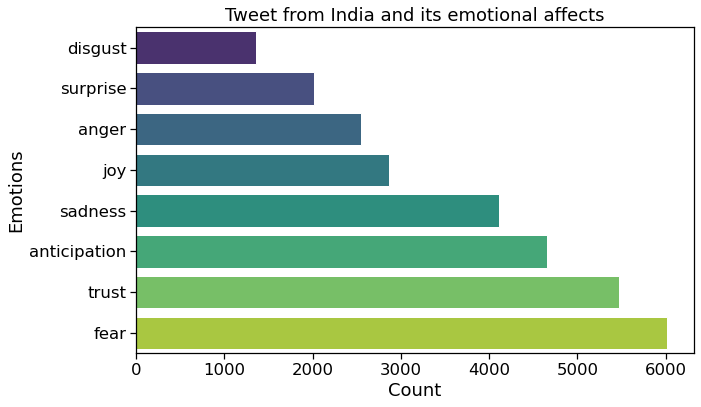

In [34]:
#sentiment using NRCLex 
# import of package
import nltk
from nrclex import NRCLex

from nltk.corpus import stopwords



df['text'] = df['text'].str.strip()



# function for convert the text and return tweets to emotions affects as dataframe

def emo_tweet(word):
    word = [word for word in word if word not in stopwords.words('english')]
    word = str([cell.encode('utf-8') for cell in word])# to convert the text into utf-8 unicode
    str_text = NRCLex(word) 
    str_text = str_text.raw_emotion_scores
    str_text = pd.DataFrame(str_text,index=[0])
    str_text = pd.melt(str_text)
    str_text.columns = ('Emotions','Count')
    str_text = str_text.sort_values('Count')
    return str_text

Ind_emo = df[df['user_location'].str.contains('India',na = False)]['text']
US_emo = df[df['user_location'].str.contains('United States',na=False)]['text']
china_emo = df[df['user_location'].str.contains('China',na=False)]['text']

India_emotion = emo_tweet(Ind_emo)
US_emotion = emo_tweet(US_emo)

# tweets emotions affects

plt.figure(figsize=(10,6))
plt.title('Tweet from India and its emotional affects')
sns.set_style('white')
sns.set_context(context='notebook',font_scale=1.2)
sns.barplot(y='Emotions',x='Count',data=India_emotion[0:8],palette='viridis');


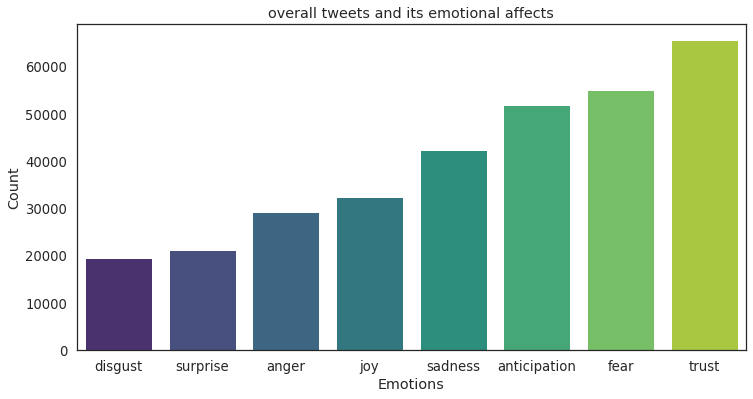

In [35]:
Overall_tweet_emo = emo_tweet(df['text'])

#plot overall
plt.figure(figsize=(12,6))
plt.title('overall tweets and its emotional affects')
sns.set_style('dark')
sns.set_context(context='notebook',font_scale=1.5)
sns.barplot(x='Emotions',y='Count',data = Overall_tweet_emo[0:8],palette='viridis');
